In [89]:
from headers import *
from DMP_Segment import *
%matplotlib notebook

In [9]:
cd ../../Data/Cornell_Data/Primitive_Library/Subject1/Interp_Segment_All

[Errno 2] No such file or directory: '../../Data/Cornell_Data/Primitive_Library/Subject1/'
/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1


In [96]:
cd Interp_Segment_All/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Interp_Segment_All


In [97]:
num_files = 31
lind = npy.load("LH_Seg_Ind.npy")
lhns = npy.load("LH_Num_Seg.npy")
lignore = npy.array([9,10,11,29])
rignore = npy.array([0,1,4,6,7,8,12,14,20,22,27,30])

In [98]:
cd ..

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1


In [101]:
# PARSING TRAJECTORY
pos = npy.load("Traj_0/lh_comp_pos_0.npy")

[Errno 2] No such file or directory: 'Traj_0/Interp_100_Basis/'
/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Force_Win_Interp_Seg


In [135]:
num_kernels = 100
start_seq = npy.zeros((lhns[0],3))
goal_seq = npy.zeros((lhns[0],3))
init_vel_seq = npy.zeros((lhns[0],3))
primitive_labels = npy.zeros(lhns[0])
# primitive_weights = npy.zeros((lhns[0],num_kernels,3))

In [136]:
overlap = 0.95
total_time = 975
time_points = npy.array([0,475,975])
roll_pos = npy.zeros((total_time,3))
roll_vel = npy.zeros((total_time,3))
roll_acc = npy.zeros((total_time,3))

In [137]:
primitives = [DMP(500) for i in range(2)]
alphaz = primitives[0].alphaz
betaz = primitives[0].betaz
tau = primitives[0].tau
dt = 1

In [139]:
cd ..

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Interp_Segment_All


In [140]:
for j in range(2):
    primitives[j].initialize_variables()
    primitives[j].load_weights(npy.load("LH_Segment_{0}/force_weights.npy".format(j)))
    seg_pos = npy.load("LH_Segment_{0}/demo_pos.npy".format(j))
    start_seq[j,:] = seg_pos[0,:3]
    goal_seq[j,:] = seg_pos[-1,:3]
    
# for j in range(lhns[0]):
#     primitive_sequence[j].initialize_variables()
#     primitive_sequence[j].load_weights(npy.load("LH_Segment_{0}/force_weights.npy".format(j)))
#     seg_pos = npy.load("LH_Segment_{0}/demo_pos.npy".format(j))
#     start_seq[j,:] = seg_pos[0,:3]
#     goal_seq[j,:] = seg_pos[-1,:3]

# Remember, must initialize the initial velocities based on the rollouts.    
# Remember, must initialize the initial velocities based on the rollouts.

In [141]:
# primitives[0].weights

In [142]:
ivel[0]

array([-0.5,  2.1, -1.3])

In [143]:
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot(pos[:,0],pos[:,1],pos[:,2])
# ax.scatter(start_seq[:,0],start_seq[:,1],start_seq[:,2])
# plt.show()

In [144]:
def calc_acc(k,t,force):
    print(force)
    roll_acc[t] = (1./tau**2)*(alphaz*(betaz*(goal_seq[k]-roll_pos[t])-tau*roll_vel[t])+force)
    
def calc_vel(t):
    roll_vel[t] = roll_vel[t-1]+roll_acc[t-1]*dt

def calc_pos(t):
    roll_pos[t] = roll_pos[t-1]+roll_vel[t-1]*dt

In [145]:
0.975*500

487.5

<IPython.core.display.Javascript object>


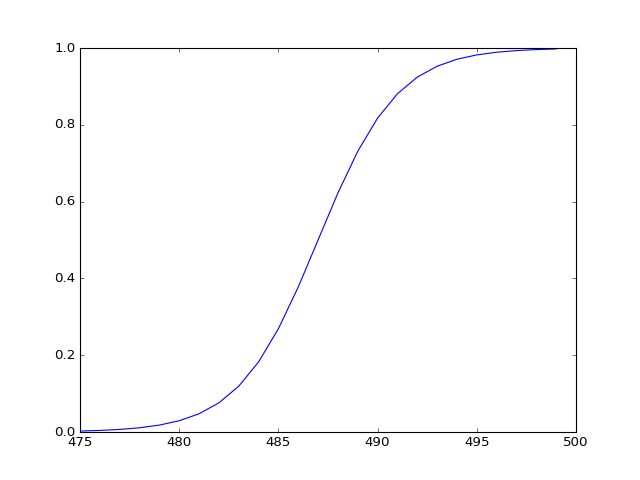

In [146]:
def sigmoid(x):
    return 1./(1.+npy.exp(-x))

def alpha_function(time,T1,W):
    return sigmoid(W*(time-0.974*T1))

tr = npy.linspace(475,500-1,25)
T1 = 500
W = 0.5

alpha = npy.zeros(25)
for t in range(25):
    alpha[t] = alpha_function(tr[t],T1,W)

fig,ax = plt.subplots()
ax.plot(tr,alpha)
plt.show()

In [131]:
cd LH_Segment_0/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Interp_Segment_All/LH_Segment_0


In [132]:
ivel = npy.load("demo_vel.npy")[:,:3]
iacc = npy.load("demo_acc.npy")[:,:3]
iacc[0]

array([-1.6, -1.9,  1.6])

In [147]:
start_seq[0],ivel[0]

(array([ -10.8, -488.1,   13.5]), array([-0.5,  2.1, -1.3]))

In [148]:
roll_pos[0] = start_seq[0]
roll_vel[0] = ivel[0]
roll_pos[0],roll_vel[0]

(array([ -10.8, -488.1,   13.5]), array([-0.5,  2.1, -1.3]))

In [149]:
# ROLLOUT: 
force = primitives[0].calc_rollout_force_time(0,roll_pos[0],goal_seq[0])
calc_acc(0,0,force)

[-33484.17584537 -38729.02696628 -52179.4800278 ]


In [150]:
roll_pos[0],roll_vel[0],goal_seq[0]

(array([ -10.8, -488.1,   13.5]),
 array([-0.5,  2.1, -1.3]),
 array([ 157.5, -262.6,  343.5]))

In [55]:
for t in range(1,475):
    force = primitives[0].calc_rollout_force_time(t,roll_pos[0],goal_seq[0])
    calc_vel(t)
    calc_pos(t)
    calc_acc(0,t,force)

[ -3862580.57927607  -5988604.0930103  -11511383.68510838]
[ -3565515.30396771  -5547263.6061516  -10397391.02050114]
[-3366127.82427418 -5262948.38522611 -9635560.85313376]
[-3219816.28271161 -5068892.15711603 -9113248.40088286]
[-3097490.76027035 -4921390.36431606 -8758578.35457995]
[-2980995.72749419 -4791317.14802939 -8517801.75545602]
[-2862327.88539979 -4662333.55938444 -8349739.04834047]
[-2742204.39980097 -4529914.97646133 -8227421.26685862]
[-2625509.7661504  -4396547.9560917  -8136149.50548417]
[-2516205.40762321 -4265213.42553454 -8065661.89184129]
[-2415690.21610305 -4136830.11969177 -8003932.05564688]
[-2324758.00754512 -4012855.26349453 -7938929.34227909]
[-2245616.73297744 -3898145.62873562 -7864417.52243405]
[-2181133.16311757 -3799473.6210519  -7780773.25238261]
[-2132131.85454064 -3721068.08789776 -7689354.21524595]
[-2095673.65204529 -3662256.86284768 -7588438.66726414]
[-2065947.73683837 -3619663.06995515 -7476393.53376991]
[-2036745.48183494 -3591207.54407798 -7357

<IPython.core.display.Javascript object>


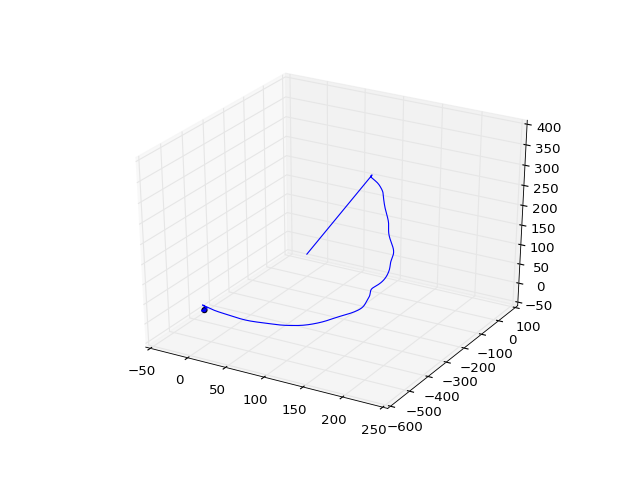

In [35]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2])
ax.scatter(roll_pos[:2,0],roll_pos[:2,1],roll_pos[:2,2])
plt.show()

<IPython.core.display.Javascript object>


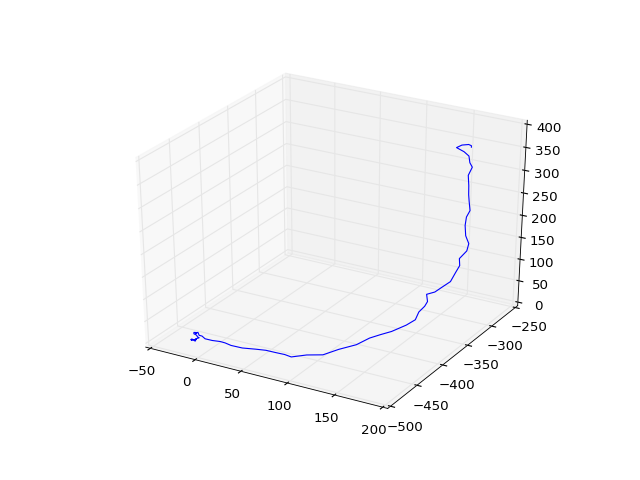

In [36]:
j=0
seg_pos = npy.load("demo_pos.npy".format(j))
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2])
plt.show()

In [37]:
for t in range(475,500):
    force_1 = primitives[0].calc_rollout_force_time(t-time_points[0],roll_pos[0],goal_seq[0])
    force_2 = primitives[1].calc_rollout_force_time(t-time_points[1],roll_pos[time_points[1]],goal_seq[1])
    
    forcing_term = (1-alpha[t-time_points[1]])*force_1+alpha[t-time_points[1]]*force_2
    calc_vel(t)
    calc_pos(t)
    calc_acc(1,t,forcing_term)
    

<IPython.core.display.Javascript object>


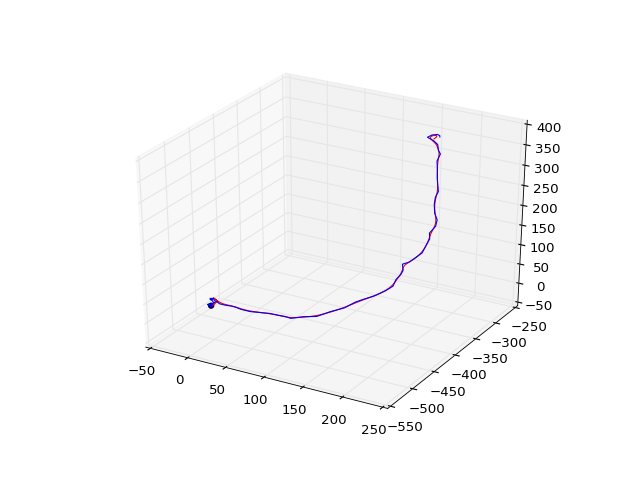

In [38]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2])
ax.plot(roll_pos[:500,0],roll_pos[:500,1],roll_pos[:500,2],'r')
# ax.plot(roll_pos[:475,0],roll_pos[:475,1],roll_pos[:475,2],'b')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2],'b')
ax.scatter(roll_pos[:2,0],roll_pos[:2,1],roll_pos[:2,2])
plt.show()

In [39]:
for t in range(500,975):
    force = primitives[1].calc_rollout_force_time(t-time_points[1],roll_pos[time_points[1]],goal_seq[1])       
    calc_vel(t)
    calc_pos(t)
    calc_acc(1,t,force)


<IPython.core.display.Javascript object>


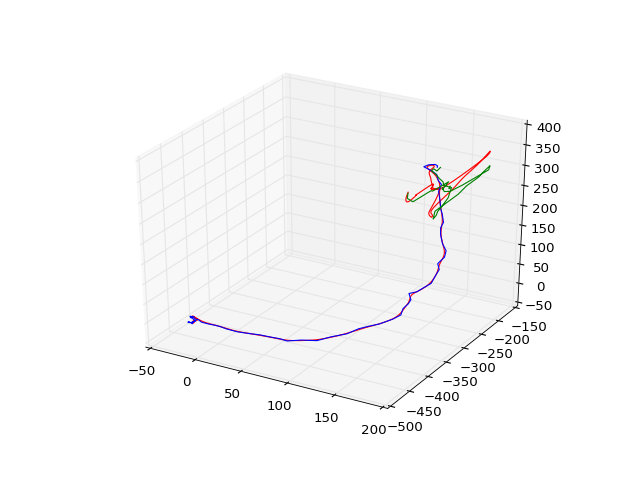

In [46]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot(roll_pos[:,0],roll_pos[:,1],roll_pos[:,2],'r')
# ax.plot(roll_pos[:500,0],roll_pos[:500,1],roll_pos[:500,2],'r')
# ax.plot(roll_pos[:475,0],roll_pos[:475,1],roll_pos[:475,2],'b')
ax.plot(seg_pos[:,0],seg_pos[:,1],seg_pos[:,2],'b')
ax.plot(seg_pos_2[:,0],seg_pos_2[:,1],seg_pos_2[:,2],'g')
plt.show()

In [44]:
cd ../LH_Segment_1/

/home/tanmay/Research/Code/ActionPrimitives/Data/Cornell_Data/Primitive_Library/Subject1/Traj_0/Interp_Segment_All/LH_Segment_1


In [45]:
seg_pos_2 = npy.load("interp_demo_pos.npy")

In [64]:
roll_pos[0:980,:]

array([[ -10.8       , -488.1       ,   13.5       ],
       [ -11.3       , -486.        ,   12.2       ],
       [ -28.98472888, -510.64506434,  -41.53487831],
       ..., 
       [ 122.51193266, -250.12165957,  254.61849627],
       [ 122.43460013, -249.17069954,  255.67157767],
       [ 122.36409042, -248.2225562 ,  256.73569141]])